# Netflix Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Config to show inline grids
%matplotlib inline
sns.set_theme(style="whitegrid")

In [3]:
# Load CSV
df = pd.read_csv('./datasets/Netflix Daily Top 10.csv')

# Show first 5 rows
df.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


## Task 1 - DataTypes

In [4]:
# DataTypes by column
df.dtypes

As of                   object
Rank                     int64
Year to Date Rank       object
Last Week Rank          object
Title                   object
Type                    object
Netflix Exclusive       object
Netflix Release Date    object
Days In Top 10           int64
Viewership Score         int64
dtype: object

## Task 2 - Period of Data Analysis

In [5]:
# Convert Date to datetime
df['As of'] = pd.to_datetime(df['As of'])

In [6]:
# Identify initial date and final date

initial_date = df['As of'].min()
final_date = df['As of'].max()

print(f'Initial Date: {initial_date}')
print(f'Final Date: {final_date}')

Initial Date: 2020-04-01 00:00:00
Final Date: 2022-03-11 00:00:00


## Task 3 - Database Size

In [7]:
# Number of lines and columns
num_lines, num_columns = df.shape
print(f'Number of lines: {num_lines}')
print(f'Number of columns: {num_columns}')

Number of lines: 7100
Number of columns: 10


## Task 4 - Verify Nullish Data

In [9]:
# Check for missing values
missing_values = df.isnull().sum()

missing_values

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

## Task 5 - Verify Outliers

In [10]:
# Analyze statistics
df.describe()

,As of,Rank,Days In Top 10,Viewership Score
count,7100,7100.000000,7100.000000,7100.000000
mean,2021-03-21 12:00:00.000000256,5.500000,24.123662,122.790141
min,2020-04-01 00:00:00,1.000000,1.000000,1.000000
25%,2020-09-25 00:00:00,3.000000,3.000000,19.000000
50%,2021-03-21 12:00:00,5.500000,7.000000,50.000000
75%,2021-09-15 00:00:00,8.000000,18.000000,128.000000
max,2022-03-11 00:00:00,10.000000,428.000000,1474.000000
std,NaN,2.872484,58.473789,213.861642


Rank                   Axes(0.125,0.11;0.227941x0.77)
Days In Top 10      Axes(0.398529,0.11;0.227941x0.77)
Viewership Score    Axes(0.672059,0.11;0.227941x0.77)
dtype: object

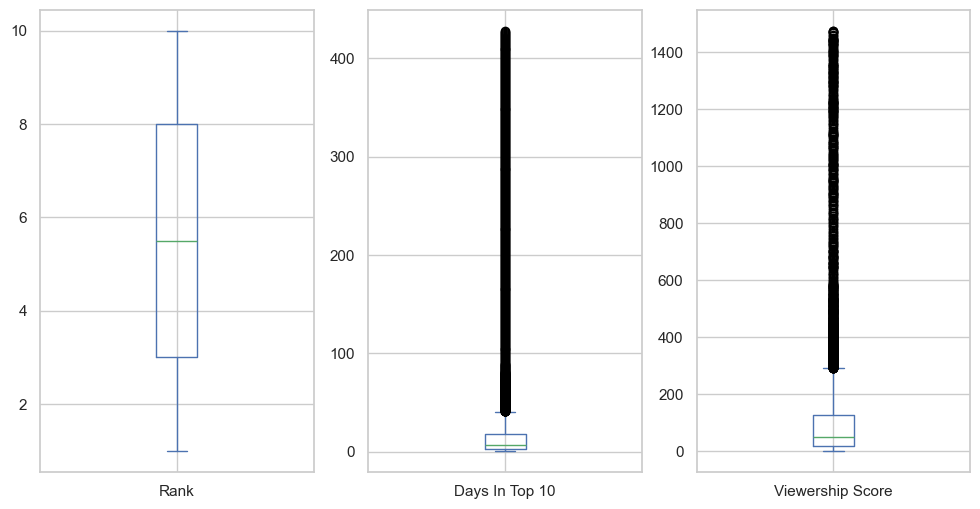

In [18]:
# Boxplot
df.plot(kind='box', figsize=(12, 6), subplots=True)

In [19]:
# Verify outliers in 'Days In Top 10'
df[df['Days In Top 10'] >= 100]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
2886,2021-01-14,7,6,8,Cocomelon,TV Show,NaN,"Jun 1, 2020",100,287
2896,2021-01-15,7,7,10,Cocomelon,TV Show,NaN,"Jun 1, 2020",101,291
2909,2021-01-16,10,7,9,Cocomelon,TV Show,NaN,"Jun 1, 2020",102,292
2919,2021-01-17,10,10,9,Cocomelon,TV Show,NaN,"Jun 1, 2020",103,293
3019,2021-01-27,10,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",104,294
...,...,...,...,...,...,...,...,...,...,...
6674,2022-01-28,5,6,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",424,1466
6687,2022-01-29,8,5,8,Cocomelon,TV Show,NaN,"Jun 1, 2020",425,1469
6718,2022-02-01,9,-,7,Cocomelon,TV Show,NaN,"Jun 1, 2020",426,1471
6959,2022-02-25,10,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",427,1472


In [20]:
# Verify the value counts of 'Title'
df.Title.value_counts()

Title
Cocomelon                       428
Ozark                            85
Cobra Kai                        81
Manifest                         80
The Queenâs Gambit             73
                               ... 
The Office                        1
Animals on the Loose: A You…      1
Dark                              1
The Secret Life of Pets 2         1
Step Up Revolution                1
Name: count, Length: 645, dtype: int64

<Axes: xlabel='Type'>

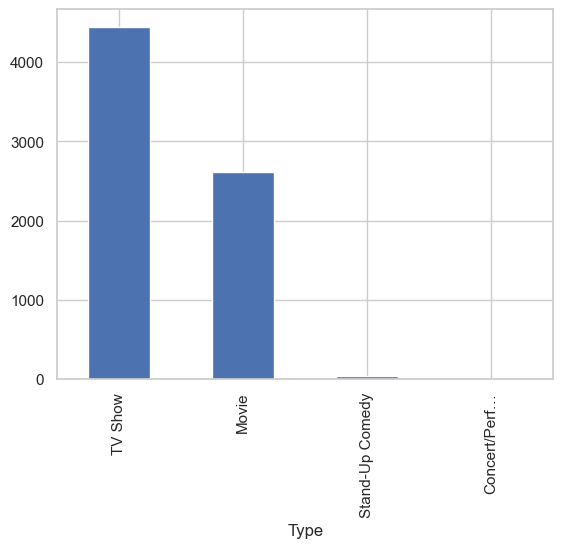

In [21]:
df.Type.value_counts().plot(kind='bar')

<Axes: >

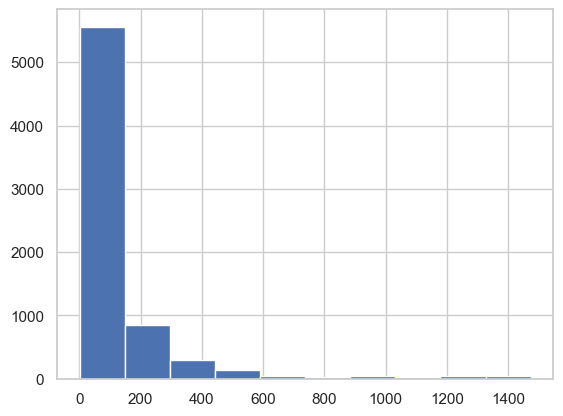

In [24]:
df['Viewership Score'].hist()

In [25]:
df[df['Viewership Score'] == df['Viewership Score'].max()]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
6998,2022-03-01,9,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",428,1474


So we can infer that the most popular show within that period was Cocomelon, for it's been in the Top 10 far more days than any other show.